In [51]:
import torch
import os
from importlib import import_module

In [52]:
def load_model(saved_model, num_classes, device, model:str):
    model_cls = getattr(import_module("model"), model)
    model = model_cls(
        num_classes=num_classes
    )

    model_path = os.path.join(saved_model, 'best.pth')
    model.load_state_dict(torch.load(model_path, map_location=device))

    return model

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

def inference_model(loader, model_dir, num_classes, model:str, break_idx=300) -> list:
    
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    
    model = load_model(model_dir, num_classes, device, model).to(device)
    model.eval()

    print(f"Calculating inference results for {model_dir}..")
    
    answers = []
    preds = []
    
    wrong_imgs, wrong_answers, wrong_labels = [], [], []
    with torch.no_grad():
        for idx, (images, labels) in enumerate(tqdm(loader)):
            images = images.to(device)
            pred = model(images)
            pred = pred.argmax(dim=-1).cpu()
            
            answers.extend(labels)
            preds.extend(pred.numpy()) 
            
            wrong_ans = (pred != labels)
            tmp = images[wrong_ans].cpu(), labels[wrong_ans].cpu(), pred[wrong_ans].cpu()
            
            wrong_imgs.extend(tmp[0])
            wrong_answers.extend(tmp[1])
            wrong_labels.extend(tmp[2])
            
            if idx >= break_idx:
                break

    cf_matrix = confusion_matrix(answers, preds, labels=list(range(num_classes)))
    sns.heatmap(cf_matrix, annot=True)
    
    plt.xlabel('pred', fontsize=14)
    plt.ylabel('answer', fontsize=14)
    
    return list(zip(wrong_imgs, wrong_answers, wrong_labels))

In [54]:
import matplotlib.pyplot as plt
from einops import rearrange
import random
import numpy as np
from dataset import MaskBaseDataset

def show(pic, num=20, mean_std=None):
    tmp = list(pic)
    pic = random.choices(tmp, k=num)
    for idx, (img, true, pred) in enumerate(pic):
        if idx >= num:
            break
        
        img = rearrange(img, 'c h w -> h w c')
        if mean_std:
            image = img
            mean, std = mean_std
            img_cp = image
            img_cp *= std
            img_cp += mean
            img_cp *= 255.0
            img_cp = np.clip(img_cp, 0, 255)
            # img = MaskBaseDataset.denormalize_image(img, mean_std[0], mean_std[1])
        plt.imshow(img)
        plt.title(f'num: {idx+1} answer: {true}, pred: {pred}')
        plt.axis('off')
        plt.show()

---

In [60]:
from dataset import MaskSplitByProfileDataset, UniformDataset, CustomAugmentation, BaseAugmentation, UniGakGakDataset

uni = MaskSplitByProfileDataset('/opt/ml/input/data/train/images')
# uni = UniGakGakDataset('/opt/ml/input/data/train/images', label_type='age')

# uni.set_transform(CustomAugmentation((384, 512), mean=1.0, std=1.0))
uni.set_transform(BaseAugmentation((384, 512), mean=1.0, std=1.0))

DL = torch.utils.data.DataLoader(uni, batch_size=10, shuffle=False)

  0%|          | 0/4860 [00:00<?, ?it/s]

Calculating inference results for /opt/ml/workspace/saved/UniGakGakDataset_BaseAugmentation_ResNetModel_SGD/age..


  6%|▌         | 300/4860 [02:55<44:32,  1.71it/s]


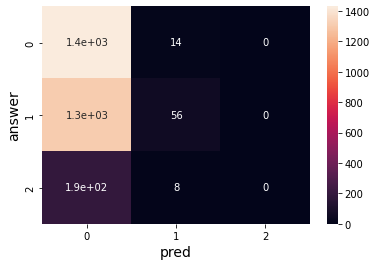

In [64]:
x = inference_model(
    DL, 
    '/opt/ml/workspace/saved/UniGakGakDataset_BaseAugmentation_ResNetModel_SGD/age', 
    3, "ResNetModel", break_idx=300
    )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


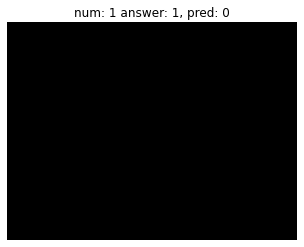

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


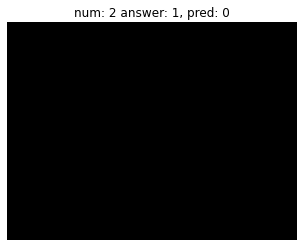

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


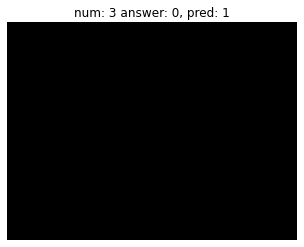

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


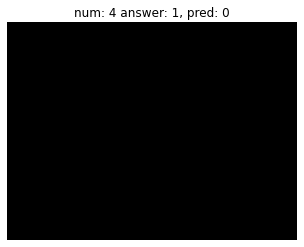

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


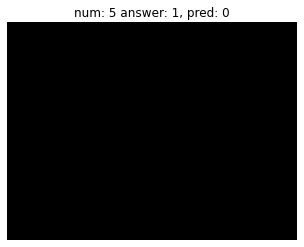

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


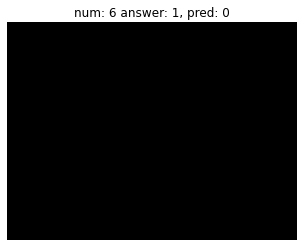

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


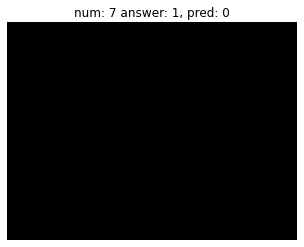

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


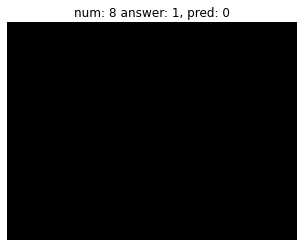

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


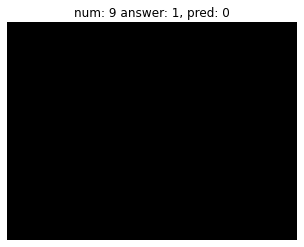

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


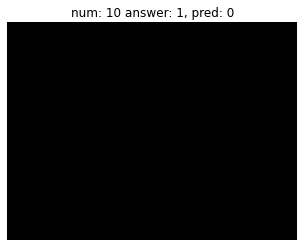

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


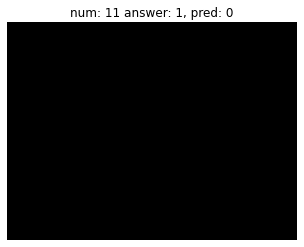

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


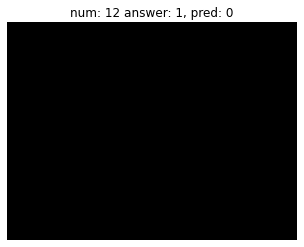

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


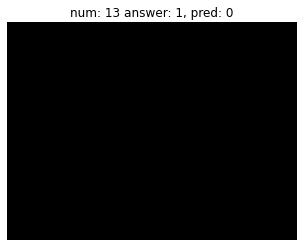

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


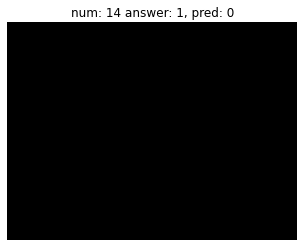

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


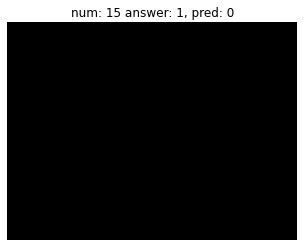

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


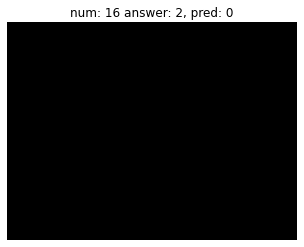

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


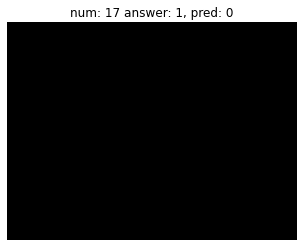

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


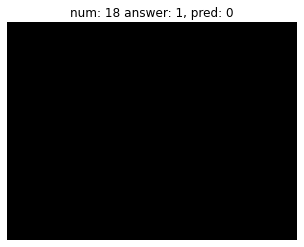

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


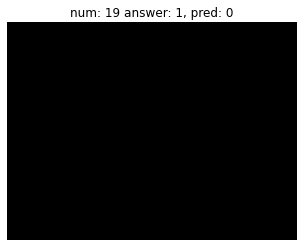

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


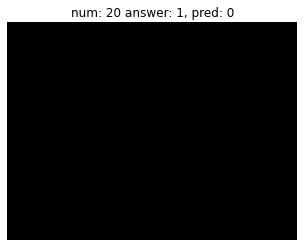

In [63]:
# show(x, num=20, mean_std=(0.5, 1.2))
show(x, num=10)

  0%|          | 0/4860 [00:00<?, ?it/s]

Calculating inference results for /opt/ml/workspace/saved/UniGakGakDataset_BaseAugmentation_ResNetModel_SGD/mask..


  2%|▏         | 100/4860 [01:02<49:17,  1.61it/s]


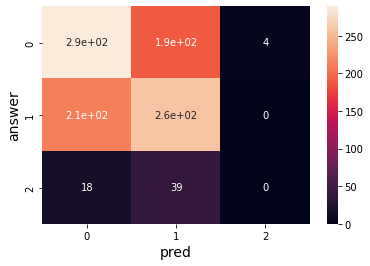

In [65]:
x = inference_model(
    DL, 
    '/opt/ml/workspace/saved/UniGakGakDataset_BaseAugmentation_ResNetModel_SGD/mask', 
    3, "ResNetModel", break_idx=100
    )

---

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html



In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#Fit the model
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cf_matrix = confusion_matrix(y_true, y_pred)
cf_matrix

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

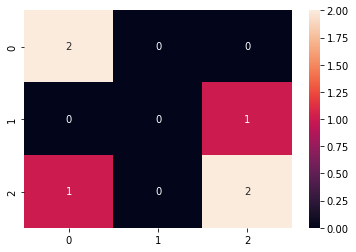

In [58]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)